In [1]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential #type: ignore
from keras.layers import Dense, Conv2D,MaxPooling2D,Dropout #type: ignore
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import copy
import cv2

In [2]:
def load_data(path):

     cats_path = path+"/cats"
     dogs_path = path+"/dogs"

     x_dataset = []
     y_dataset = []


     for img in os.listdir(cats_path):
            img_path = cats_path+"/"+img

            try:
                img_arr = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
                img_arr = cv2.resize(img_arr,(256,256))

                x_dataset.append(img_arr)
                y_dataset.append(1)

            except Exception as e:
                print(img_path+" was not Added.")
                print(e)


     for img in os.listdir(dogs_path):
            img_path = dogs_path+"/"+img

            try:
                img_arr = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
                img_arr = cv2.resize(img_arr,(256,256))

                x_dataset.append(img_arr)
                y_dataset.append(0)

            except Exception as e:
                print(img_path+" was not Added.")
                print(e)


     x = np.array(x_dataset)
     y = np.array(y_dataset)

     # Shuffling the data

     indices = np.arange(len(x))
     np.random.shuffle(indices)

     x_shuffled = x[indices]
     y_shuffled = y[indices]

     return x_shuffled, y_shuffled

In [3]:
train_path = "/content/drive/MyDrive/Colab Notebooks/dataset/training_set/training_set"
test_path = "/content/drive/MyDrive/Colab Notebooks/dataset/test_set/test_set"


x_train,y_train = load_data(train_path)
x_test, y_test = load_data(test_path)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

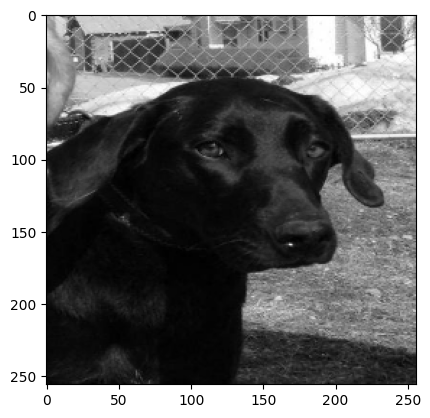

y = 0, It is a Dog


In [4]:
classes = {0: "Dog", 1: "Cat"}

index = 1

plt.imshow(x_test[index].reshape(256, 256), cmap='gray')
plt.show()

# Access the first (and only) element of the array
class_index = y_test[index][0]
print(f"y = {class_index}, It is a {classes[class_index]}")

In [5]:
x_train = x_train.reshape(x_train.shape[0], 256,256, 1)
x_test = x_test.reshape(x_test.shape[0], 256,256, 1)

In [6]:
x_train[1].shape

(256, 256, 1)

In [7]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [8]:
x_train[1].shape

(256, 256, 1)

In [9]:
x_train.shape[0]

8005

In [10]:
x_train = x_train.reshape(x_train.shape[0], 256,256, 1)
x_test = x_test.reshape(x_test.shape[0], 256,256, 1)

In [11]:
import keras
from keras.models import Sequential  #type:ignore
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense  #type:ignore
from keras.optimizers import Adam #type:ignore


In [12]:
def cnnmodel():
    model = Sequential([
        Conv2D(64, (3,3), activation='relu', input_shape=(256,256,1), padding='same'),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(128, (3,3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(256, (3,3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),#type:ignore
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [13]:
model = cnnmodel()
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy}")

predictions = model.predict(x_test)


NameError: name 'new_cnn_model' is not defined

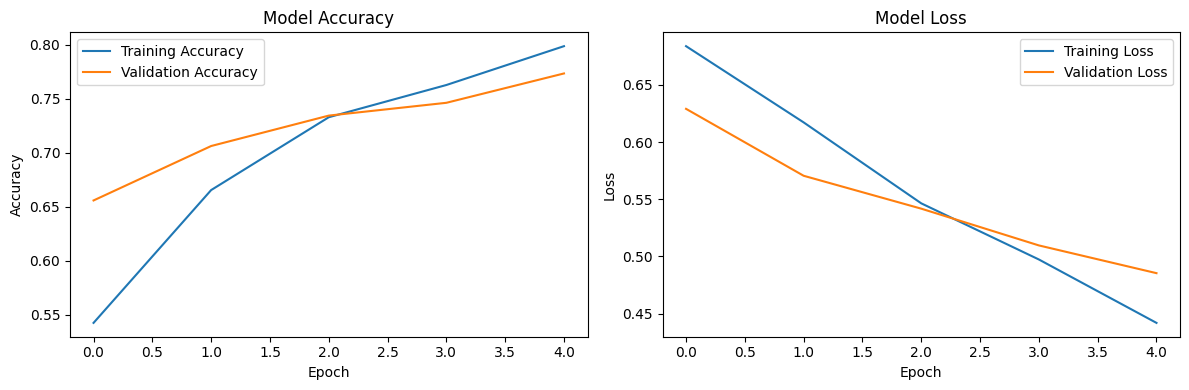

In [23]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Visualize a sample image (optional)


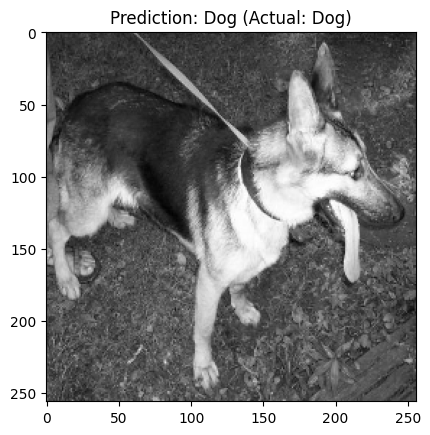

In [25]:
classes = {0: "Dog", 1: "Cat"}
index = 9
plt.figure()
plt.imshow(x_test[index].reshape(256, 256), cmap='gray')
plt.title(f"Prediction: {classes[round(predictions[index][0])]} (Actual: {classes[y_test[index][0]]})")
plt.show()

In [33]:
model.save("dogcatclassifier.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 417ms/step


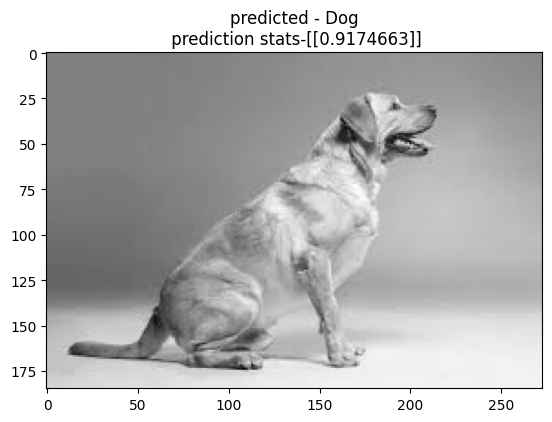

Predicted : Dog


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model # type: ignore
import cv2


def preprocess_image(image_path):
    """
    Preprocess the input image to match the format expected by the model.
    Args:
        image_path (str): Path to the image file.
    Returns:
        np.array: Preprocessed image ready for prediction.
    """
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise ValueError("Image not found or unable to open.")


    image = cv2.resize(image, (256,256))

    # Normalize pixel values to be between 0 and 1
    image = image.astype('float32') / 255.0


    image = np.reshape(image, (1, 256,256, 1))

    return image


def display_image(image_path,predicted_digit,prediction):
    """
    Display the original image.
    Args:
        image_path (str): Path to the image file.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise ValueError("Image not found or unable to open.")

    plt.imshow(image, cmap='gray')
    plt.title(f"predicted - {predicted_digit}\n prediction stats-{prediction}")

    plt.show()


def main(image_path):
    # Load the saved model
    model = load_model('/content/dogcatclassifier.h5')

    # Preprocess the image
    image = preprocess_image(image_path)

    # Make a prediction
    prediction = model.predict(image)

    # Get the predicted digit
    predicted_digit = np.argmax(prediction)

    if predicted_digit==0:
        predicted_digit='Dog'
    elif predicted_digit==1:
        predicted_digit='Cat'
    else:
        predicted_digit='Neither'
    # Display the original image
    display_image(image_path,predicted_digit,prediction)

    # Print the predicted digit
    print("Predicted :", predicted_digit)

def run():
        image_path = "/content/drive/MyDrive/Colab Notebooks/images.jpeg"
        main(image_path)


run()